In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
df = pd.read_excel('financeiro_atualizado.xlsx')
df_orcamentos = pd.read_excel('financeiro.xlsx', sheet_name='Planejamento')

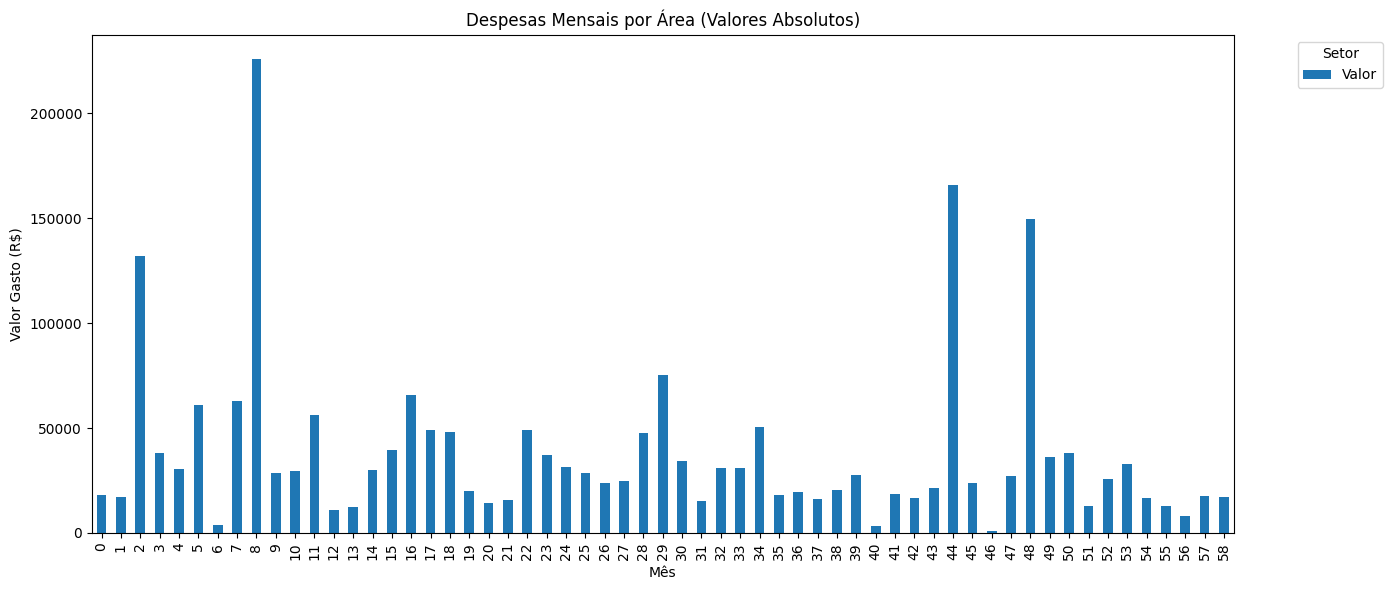

In [36]:
#Como estão distribuídas as despesas mensais por área (RH, transporte, comercial...)?
df['Data'] = pd.to_datetime(df['Data'])
df['AnoMes'] = df['Data'].dt.to_period('M')
despesas_por_setor_mes = df.groupby(['Setor', 'AnoMes'])['Valor'].sum().reset_index()
despesas_por_setor_mes.head(20)





In [30]:
#Quais áreas têm maior custo com pessoal, materiais, logística? 
custos_por_area_tipo = df.groupby(['Setor', 'Tipo'])['Valor'].sum().reset_index()
custos_por_area_tipo


,Setor,Tipo,Valor
0,Comercial,Compra Matéria-prima,64619.59
1,Comercial,Energia,344606.67
2,Comercial,Internet,66593.62
3,Comercial,Salário,144451.68
4,Comercial,Água,95183.25
5,Financeiro,Compra Matéria-prima,66637.18
6,Financeiro,Energia,61636.86
7,Financeiro,Internet,18573.91
8,Financeiro,Salário,70313.26
9,Financeiro,Água,163483.07


In [31]:
#Qual o perfil de gastos nos últimos trimestres? Alguma sazonalidade? 
df['Trimestre'] = df['Data'].dt.to_period('Q')

gastos_trimestrais = df.groupby(['Setor', 'Trimestre'])['Valor'].sum().reset_index()

gastos_trimestrais


,Setor,Trimestre,Valor
0,Comercial,2024Q2,35361.83
1,Comercial,2024Q3,200732.62
2,Comercial,2024Q4,128168.29
3,Comercial,2025Q1,284164.24
4,Comercial,2025Q2,67027.83
5,Financeiro,2024Q2,42564.69
6,Financeiro,2024Q3,154311.73
7,Financeiro,2024Q4,82044.54
8,Financeiro,2025Q1,64797.56
9,Financeiro,2025Q2,36925.76


In [32]:
#Há fornecedores ou categorias com variações anormais de custo? 


In [33]:

# Certifique-se que a coluna Data é datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar a coluna Trimestre
df['Trimestre'] = df['Data'].dt.to_period('Q')

# Agrupar gastos por Setor e Trimestre
gastos_trimestrais = df.groupby(['Setor', 'Trimestre'])['Valor'].sum().reset_index()

# Criar um índice com todos os trimestres entre a data mínima e máxima do dataset
todos_trimestres = pd.period_range(start=df['Data'].min().to_period('Q'), 
                                   end=df['Data'].max().to_period('Q'), freq='Q')

# Criar um DataFrame com todas as combinações de Setor x Trimestre (para preencher faltantes)
setores = df['Setor'].unique()
index = pd.MultiIndex.from_product([setores, todos_trimestres], names=['Setor', 'Trimestre'])
todos_dados = pd.DataFrame(index=index).reset_index()

# Juntar com os dados reais (left join)
df_completo = pd.merge(todos_dados, gastos_trimestrais, how='left', on=['Setor', 'Trimestre'])

# Preencher valores faltantes com zero
df_completo['Valor'] = df_completo['Valor'].fillna(0)

df_completo


,Setor,Trimestre,Valor
0,Financeiro,2024Q2,42564.69
1,Financeiro,2024Q3,154311.73
2,Financeiro,2024Q4,82044.54
3,Financeiro,2025Q1,64797.56
4,Financeiro,2025Q2,36925.76
5,Logística,2024Q2,59932.02
6,Logística,2024Q3,96516.20
7,Logística,2024Q4,124575.99
8,Logística,2025Q1,61974.66
9,Logística,2025Q2,50547.87


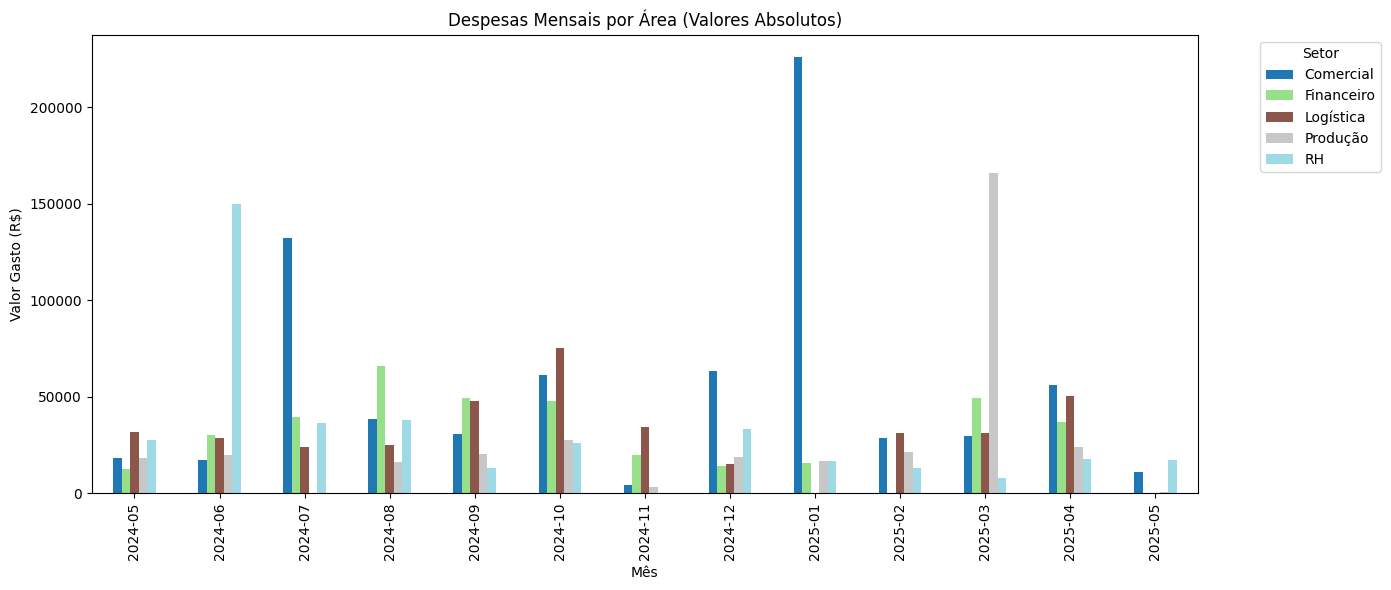

In [34]:
import matplotlib.pyplot as plt

df['Mes'] = df['Data'].dt.to_period('M')
gastos_area = df.groupby(['Mes', 'Setor'])['Valor'].sum().unstack().fillna(0)


gastos_area.plot(kind='bar', figsize=(14, 6), colormap='tab20')
plt.title('Despesas Mensais por Área (Valores Absolutos)')
plt.xlabel('Mês')
plt.ylabel('Valor Gasto (R$)')
plt.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


COMERCIAL FOI O QUE MAIS GASTOU 

In [35]:

df_gastos_categoria = df.groupby(['Setor'])['Valor'].sum().unstack().fillna(0)


df_gastos_categoria.plot(kind='bar', figsize=(12, 6))
plt.title('Custo por Categoria em Cada Área')
plt.xlabel('Setor')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [ ]:
# Agrupar por trimestre
df['Trimestre'] = df['Data'].dt.to_period('Q')
gastos_trimestrais = df.groupby('Trimestre')['Valor'].sum()

# Plotar
gastos_trimestrais.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Evolução dos Gastos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Total Gasto (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcular média e desvio padrão por fornecedor
df_fornecedor = df.groupby('Fornecedor')['Valor'].agg(['mean', 'std']).dropna()

# Identificar valores muito acima da média (ex: mais de 2 desvios)
limite = df_fornecedor['mean'] + 2 * df_fornecedor['std']
fornecedores_anormais = df_fornecedor[df_fornecedor['mean'] > limite]

# Plotar
df_fornecedor.sort_values('mean', ascending=False).head(10)['mean'].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Fornecedores com Maior Custo Médio')
plt.ylabel('Custo Médio (R$)')
plt.tight_layout()
plt.show()
